<a href="https://colab.research.google.com/github/valeco60/COLAB/blob/main/CPM_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalar e importar las librerías necesarias
!pip install criticalpath
from criticalpath import Node
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for criticalpath: filename=criticalpath-0.1.5-py3-none-any.whl size=12043 sha256=696518a33e14dae87d1cde7a0ec98a800c003ca9b5a6ae54447fecab5262f689
  Stored in directory: /root/.cache/pip/wheels/7f/73/52/05bd7123746d122eaac5110494188de592541a30bb782670e5
Successfully built criticalpath


In [ ]:
#Ingresar los datos del modelo (Tareas y dependencias)
p = Node('proyecto')

tareas = [("A", {"duracion": 3}), 
          ("B", {"duracion": 2}), 
          ("C", {"duracion": 4}), 
          ("D", {"duracion": 3}), 
          ("E", {"duracion": 2}), 
          ("F", {"duracion": 4}), 
          ("G", {"duracion": 2}), 
          ("H", {"duracion": 1}), 
          ("I", {"duracion": 2}), 
          ("J", {"duracion": 4})]

dependencias = [("A", "E"), 
                ("B", "E"), 
                ("E", "F"),
                ("F", "G"), 
                ("G", "I"), 
                ("I", "J"),
                ("C", "J"), 
                ("H", "I"), 
                ("D", "H")]

# Cargar al proyecto las tareas y sus duraciones
for i in tareas:
    p.add(Node(i[0], duration=i[1]["duracion"]))

# Cargar al proyecto sus dependencias (secuencias)
for j in dependencias:
    p.link(j[0],j[1])

# Actualizar el proyecto:
p.update_all()


In [ ]:
p.get_critical_path()


[A, E, F, G, I, J]

In [ ]:
p.duration

17

In [ ]:
ruta_critica = [str(n) for n in p.get_critical_path()]

proj_fecha_inicio = datetime.date.today()

proj_calendario = pd.DataFrame([dict(Tarea = key, 
                                   Inicio = datetime.date.today(), 
                                   Fin = datetime.date.today() + datetime.timedelta(val['duracion']*7), 
                                   Status = 'Actividad Normal')
                              for key, val in dict(tareas).items()])

for key, val in dict(tareas).items():
    dep = [d for d in dependencias if d[1] == key]
    prev_tareas = [t[0] for t in dep]
    if prev_tareas:
        prev_fin = proj_calendario[proj_calendario.Tarea.isin(prev_tareas)]['Fin'].max()
        proj_calendario.loc[proj_calendario.Tarea == key, 'Inicio'] = prev_fin
        proj_calendario.loc[proj_calendario.Tarea == key, 'Fin'] = prev_fin + datetime.timedelta(val['duracion']*7)
        
proj_calendario.loc[proj_calendario.Tarea.isin(ruta_critica), 'Status'] = 'Ruta Crítica'
        
display(proj_calendario)

,Tarea,Inicio,Fin,Status
0,A,2023-03-02,2023-03-23,Ruta Crítica
1,B,2023-03-02,2023-03-16,Actividad Normal
2,C,2023-03-02,2023-03-30,Actividad Normal
3,D,2023-03-02,2023-03-23,Actividad Normal
4,E,2023-03-23,2023-04-06,Ruta Crítica
5,F,2023-04-06,2023-05-04,Ruta Crítica
6,G,2023-05-04,2023-05-18,Ruta Crítica
7,H,2023-03-23,2023-03-30,Actividad Normal
8,I,2023-05-18,2023-06-01,Ruta Crítica
9,J,2023-06-01,2023-06-29,Ruta Crítica


In [ ]:
# Número de días desde que el proyecto inicia hasta que la tarea inicia
proj_calendario['dias_inicio'] = (proj_calendario.Inicio-proj_fecha_inicio).dt.days
# Número de días desde que el proyecto inicia hasta que la tarea finaliza
proj_calendario['dias_fin'] = (proj_calendario.Fin-proj_fecha_inicio).dt.days
# Dísa entre el inicio y el fin de cada tarea
proj_calendario['dias_inicio_fin'] = proj_calendario.dias_fin - proj_calendario.dias_inicio

In [ ]:
display(proj_calendario)

,Tarea,Inicio,Fin,Status,dias_inicio,dias_fin,dias_inicio_fin
0,A,2023-03-02,2023-03-23,Ruta Crítica,0,21,21
1,B,2023-03-02,2023-03-16,Actividad Normal,0,14,14
2,C,2023-03-02,2023-03-30,Actividad Normal,0,28,28
3,D,2023-03-02,2023-03-23,Actividad Normal,0,21,21
4,E,2023-03-23,2023-04-06,Ruta Crítica,21,35,14
5,F,2023-04-06,2023-05-04,Ruta Crítica,35,63,28
6,G,2023-05-04,2023-05-18,Ruta Crítica,63,77,14
7,H,2023-03-23,2023-03-30,Actividad Normal,21,28,7
8,I,2023-05-18,2023-06-01,Ruta Crítica,77,91,14
9,J,2023-06-01,2023-06-29,Ruta Crítica,91,119,28


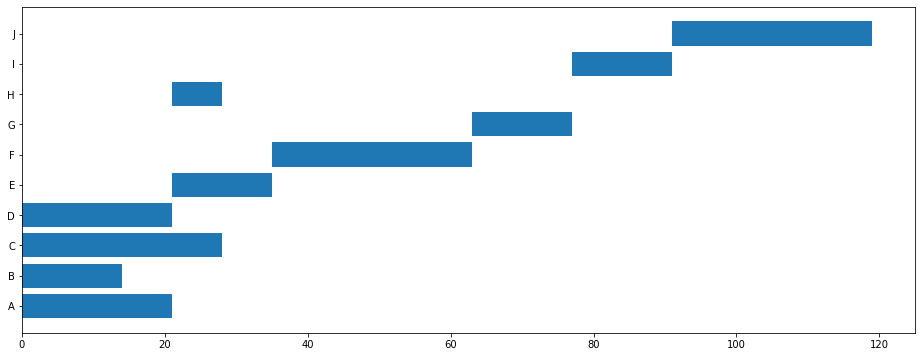

In [ ]:
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(proj_calendario.Tarea, proj_calendario.dias_inicio_fin, left=proj_calendario.dias_inicio)
plt.show()

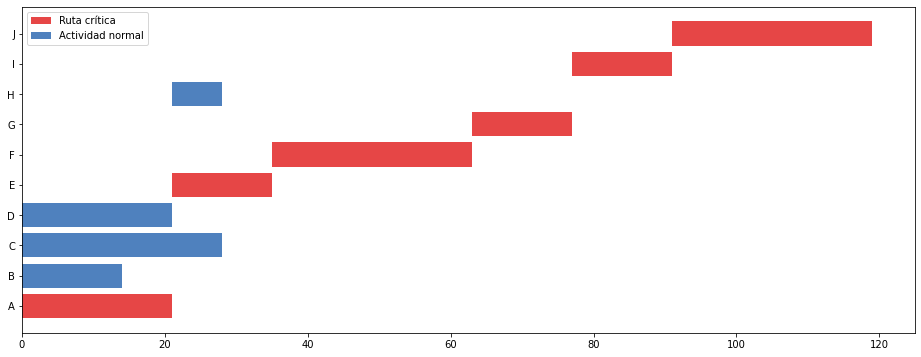

In [ ]:
# Dar color rojo a las columnas de actividades críticas
def color(row):
    c_dict = {'Ruta Crítica':'#E64646', 'Actividad Normal':'#4F81BE'}
    return c_dict[row['Status']]
proj_calendario['color'] = proj_calendario.apply(color, axis=1)
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(proj_calendario.Tarea, proj_calendario.dias_inicio_fin, left=proj_calendario.dias_inicio, color=proj_calendario.color)

#Anexar leyendas
c_dict = {'Ruta crítica':'#E64646', 'Actividad normal':'#4F81BE'}
leyenda = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=leyenda)

plt.show()